Vaccum Cleaning Agent with locations A and B

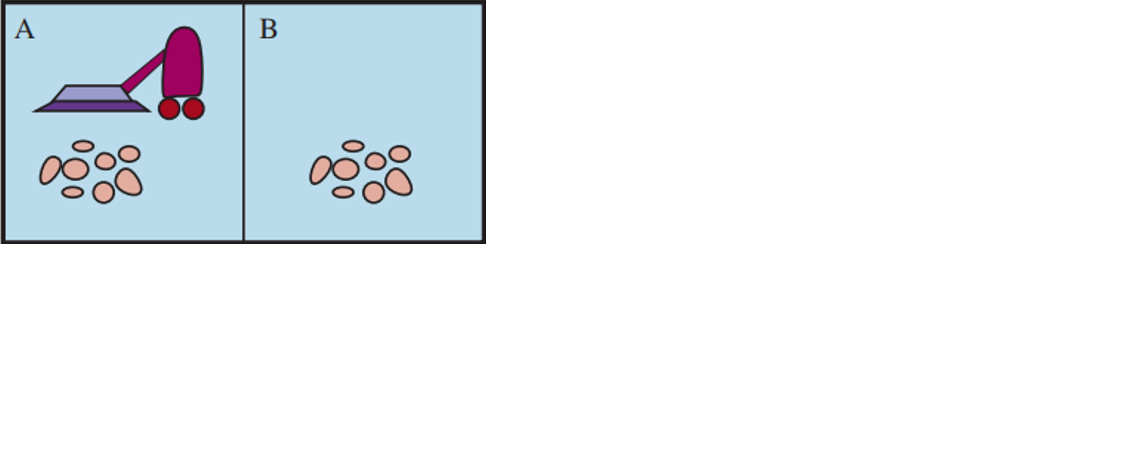

# Some important things:

1. Agent Description: The aim of the agent .....
2. List the sensors: Location, Status
3. Sensors' values:
>Location -> {A, B}, Status -> {Dirty, Clean}
4. List the actions: Suck, Right, Left
5. Agent function: **perception --> action**
> [A, Clean] --> Right <br>
> [A, Dirty] --> Suck<br>
> [B, Clean] --> Left<br>
> [B, Dirty] --> Suck<br>



# Table driven agent

In [ ]:
table={('A','Clean'):'Right',
       ('A','Dirty'):'Suck',
       ('B','Clean'):'Left',
       ('B','Dirty'):'Suck'}

percepts=[]  # to store percept sequence  
def table_driven_agent(percept):
    print('Perception Received: '+ str(percept))
    percepts.append(percept) # updating percept history
    action = lookup(percept,table) # searching for action
    return action

def lookup(percept,table):
    #for key in table:
    #    if key == percept:
    #        return table[key]
    return table[percept]

# lets simulate the agent
import random
Location = random.choice(['A','B'])
Condition = random.choice(['Clean','Dirty'])

while True: # to perceieve environment repeatedly
    action = table_driven_agent((Location, Condition))
    print('Action Performed: '+ action)
    cmd = input('Get Perception (yes/no): ')
    if(cmd == 'no' or cmd != 'yes'): break
    if action == 'Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    else:
        Condition = 'Clean'   

Perception Received: ('B', 'Clean')
Action Performed: Left
Get Perception (yes/no): yes
Perception Received: ('A', 'Dirty')
Action Performed: Suck
Get Perception (yes/no): yes
Perception Received: ('A', 'Clean')
Action Performed: Right
Get Perception (yes/no): yes
Perception Received: ('B', 'Dirty')
Action Performed: Suck
Get Perception (yes/no): no


# Simple reflex agent

In [ ]:
def simple_reflex_agent(percept):
    print('Perception Received: '+ str(percept))
    location = percept[0]
    status = percept[1]
    if status =='Dirty':
        action = 'Suck'
    elif location == 'A':
        action = 'Right'
    elif location =='B':
        action = 'Left'
    return action

import random
Location = random.choice(['A','B'])
Condition = random.choice(['Clean','Dirty'])

while True:
    action= simple_reflex_agent((Location,Condition))
    print('Action Performed: '+ action)
    cmd = input('Get Perception (yes/no): ')
    if(cmd == 'no' or cmd != 'yes'): break
    if action == 'Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action== 'Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    else:
        Condition = 'Clean'

    

Perception Received: ('A', 'Clean')
Action Performed: Right
Get Perception (yes/no): yes
Perception Received: ('B', 'Clean')
Action Performed: Left
Get Perception (yes/no): yes
Perception Received: ('A', 'Dirty')
Action Performed: Suck
Get Perception (yes/no): yes
Perception Received: ('A', 'Clean')
Action Performed: Right
Get Perception (yes/no): no


# Model based agent

In [ ]:
model = {'A':'Unknown', 'B':'Unknown'}
world_state = 'Bad'
action = 'Unknown'

def update_state(action, percept, model):
    location = percept[0]
    status = percept[1]
    model[location] = status #udate the model based on current perception
    
    global world_state
    #udate the model based on action
    if action == 'Suck':
        model[location]='Clean'
    # model checking to update world state
    if model['A']=='Clean' and model['B']=='Clean': 
        world_state = 'Good'
    else:
        world_state = 'Bad'
    return world_state
        

def model_based_reflex_agent(percept):
    location = percept[0]
    status = percept[1]
    
    global world_state,action,model
    
    if world_state == 'Good':
        action = 'Pause'
        return action
    elif status == 'Dirty':
        action = 'Suck'
    elif location == 'A':
        action = 'Right'
    elif location == 'B':
        action = 'Left'
    world_state = update_state(action, percept, model)
    print('Perception: '+str(percept)) 
    print('Action Performed: '+ action)    
    print('Model: '+str(model))   
    print('State: '+str(world_state))    
    return action


import random
Location = random.choice(['A','B'])
Condition= random.choice(['Clean','Dirty'])

while True:
    print('*****')
    action = model_based_reflex_agent((Location,Condition))
    if action == 'Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Suck':
        Condition = 'Clean'
    elif action == 'Pause':
        cmd = input('Stopped. Do restart? (yes/no): ')
        if(cmd == 'no' or cmd != 'yes'): break
        Location = random.choice(['A','B'])
        Condition = random.choice(['Clean','Dirty'])
        model = {'A':'Unknown', 'B':'Unknown'}
        world_state = 'Bad'
        action = 'Unknown'    

*****
Perception: ('A', 'Clean')
Action Performed: Right
Model: {'A': 'Clean', 'B': 'Unknown'}
State: Bad
*****
Perception: ('B', 'Clean')
Action Performed: Left
Model: {'A': 'Clean', 'B': 'Clean'}
State: Good
*****
Stopped. Do restart? (yes/no): yes
*****
Perception: ('A', 'Clean')
Action Performed: Right
Model: {'A': 'Clean', 'B': 'Unknown'}
State: Bad
*****
Perception: ('B', 'Dirty')
Action Performed: Suck
Model: {'A': 'Clean', 'B': 'Clean'}
State: Good
*****
Stopped. Do restart? (yes/no): no


# **Exercise 1**

Implement diffierent types of agent implementation to do a certain task of your choice. 
1. Table Driven Agent
2. Simple Reflex Agent

<p><b>Before implementation describe the following:</b></p>

1. Agent Description: The aim of the agent .....
2. List the sensors:
3. Sensors' values: 
3. List the actions:
4. Agent function: perception --> action

Washing Machine Agent with locations A and B

1. Agent Description: The aim of the agent is to clean dirty clothes.
2. List the sensors: Location, Status
3. Sensors' values:
>Location -> {A, B}, Status -> {Dirty, Clean}
4. List the actions: Wash, Right, Left
5. Agent function: **perception --> action**
> [A, Clean] --> Right<br>
> [A, Dirty] --> Wash<br>
> [B, Clean] --> Left<br>
> [B, Dirty] --> Wash<br>

In [ ]:
table={('A','Clean'):'Right',
       ('A','Dirty'):'Wash',
       ('B','Clean'):'Left',
       ('B','Dirty'):'Wash'}

percepts=[]  # to store percept sequence  
def table_driven_agent(percept):
    print('Perception Received: '+ str(percept))
    percepts.append(percept) # updating percept history
    action = lookup(percept,table) # searching for action
    return action

def lookup(percept,table):
    #for key in table:
    #    if key == percept:
    #        return table[key]
    return table[percept]

# lets simulate the agent
import random
Location = random.choice(['A','B'])
Condition = random.choice(['Clean','Dirty'])

while True: # to perceieve environment repeatedly
    action = table_driven_agent((Location, Condition))
    print('Action Performed: '+ action)
    cmd = input('Get Perception (yes/no): ')
    if(cmd == 'no' or cmd != 'yes'): break
    if action == 'Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    else:
        Condition = 'Clean'

Perception Received: ('A', 'Dirty')
Action Performed: Wash
Get Perception (yes/no): yes
Perception Received: ('A', 'Clean')
Action Performed: Right
Get Perception (yes/no): yes
Perception Received: ('B', 'Clean')
Action Performed: Left
Get Perception (yes/no): no
